In [1]:
import os
os.getcwd()


'C:\\Users\\Diya\\Downloads\\teams-engagement-project\\src\\notebooks'

In [2]:
import os
os.chdir("C:/Users/Diya/Downloads/teams-engagement-project")
os.getcwd()


'C:\\Users\\Diya\\Downloads\\teams-engagement-project'

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier

df = pd.read_csv("data/features.csv")
df.head()


,user_id,signup_date,user_tier,org_size,session_duration_sec_mean,session_duration_sec_median,session_duration_sec_max,event_count_mean,event_count_sum,meeting_count_sum,message_count_sum,crash_count_sum,avg_latency_mean
0,user_0,2025-02-08,free,small,172.689873,0.0,2649.0,1.218354,385.0,38.0,196.0,1.0,120.936485
1,user_1,2025-01-08,free,small,138.894737,0.0,1718.0,1.164087,376.0,52.0,206.0,1.0,120.066953
2,user_2,2025-01-19,free,small,151.927835,0.0,2634.0,1.161512,338.0,37.0,174.0,1.0,118.209681
3,user_3,2025-02-22,free,medium,173.365132,0.0,3538.0,1.190789,362.0,46.0,176.0,4.0,122.381846
4,user_4,2025-01-22,free,medium,132.264151,0.0,2485.0,1.172956,373.0,50.0,193.0,0.0,122.218568


In [4]:

df['high_engagement'] = (df['session_duration_sec_mean'] > df['session_duration_sec_mean'].median()).astype(int)


In [5]:
feature_cols = [
    'session_duration_sec_mean',
    'session_duration_sec_median',
    'session_duration_sec_max',
    'event_count_mean',
    'event_count_sum',
    'meeting_count_sum',
    'message_count_sum',
    'crash_count_sum',
    'avg_latency_mean'
]

X = df[feature_cols]
y_reg = df['session_duration_sec_mean']         
y_clf = df['high_engagement']                   


In [6]:
# 1. Drop rows where target is NaN
df_clean = df.dropna(subset=['session_duration_sec_mean'])

# 2. Define X and y again using the cleaned dataframe
X = df_clean[feature_cols]
y_reg = df_clean['session_duration_sec_mean']    # regression
y_clf = df_clean['high_engagement']              # classification

# 3. Impute missing values in X
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# 4. Train-test split (regression)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X_imputed, y_reg, test_size=0.2, random_state=42
)

# 5. Train-test split (classification)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_imputed, y_clf, test_size=0.2, random_state=42
)

# 6. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_reg)
pred_lin = lin_reg.predict(X_test_scaled)

print("Linear Regression OK")


Linear Regression OK


In [7]:
dt_reg = DecisionTreeRegressor(max_depth=6)
dt_reg.fit(X_train, y_train_reg)
pred_dt = dt_reg.predict(X_test)


In [8]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train_reg)
pred_rf = rf_reg.predict(X_test)


In [9]:
svm_reg = SVR(kernel='rbf', C=1.0)
svm_reg.fit(X_train_scaled, y_train_reg)
pred_svm = svm_reg.predict(X_test_scaled)


In [10]:
nn_reg = MLPRegressor(hidden_layer_sizes=(64,32),
                      activation='relu',
                      max_iter=500,
                      random_state=42)
nn_reg.fit(X_train_scaled, y_train_reg)
pred_nn = nn_reg.predict(X_test_scaled)


C:\Users\Diya\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

models_reg = {
    "Linear Regression": pred_lin,
    "Decision Tree": pred_dt,
    "Random Forest": pred_rf,
    "SVM": pred_svm,
    "Neural Network": pred_nn
}

for name, preds in models_reg.items():
    mse = mean_squared_error(y_test_reg, preds)
    rmse = mse ** 0.5
    r2 = r2_score(y_test_reg, preds)
    print(f"{name}: RMSE={rmse:.2f}, R2={r2:.3f}")


Linear Regression: RMSE=0.00, R2=1.000
Decision Tree: RMSE=2.63, R2=0.986
Random Forest: RMSE=1.76, R2=0.994
SVM: RMSE=17.81, R2=0.373
Neural Network: RMSE=43.51, R2=-2.740


In [12]:
dt_clf = DecisionTreeClassifier(max_depth=6)
dt_clf.fit(X_train, y_train_clf)
pred_clf_dt = dt_clf.predict(X_test)


In [13]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train_clf)
pred_clf_rf = rf_clf.predict(X_test)


In [14]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train_scaled, y_train_clf)
pred_clf_svm = svm_clf.predict(X_test_scaled)


In [15]:
nn_clf = MLPClassifier(hidden_layer_sizes=(64,32),
                       max_iter=500,
                       random_state=42)
nn_clf.fit(X_train_scaled, y_train_clf)
pred_clf_nn = nn_clf.predict(X_test_scaled)


In [16]:
models_clf = {
    "Decision Tree": pred_clf_dt,
    "Random Forest": pred_clf_rf,
    "SVM": pred_clf_svm,
    "Neural Net": pred_clf_nn
}

for name, preds in models_clf.items():
    acc = accuracy_score(y_test_clf, preds)
    f1 = f1_score(y_test_clf, preds)
    print(f"{name}: Accuracy={acc:.2f}, F1={f1:.2f}")


Decision Tree: Accuracy=1.00, F1=1.00
Random Forest: Accuracy=1.00, F1=1.00
SVM: Accuracy=0.82, F1=0.83
Neural Net: Accuracy=0.86, F1=0.86


In [17]:
import numpy as np

importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

for i in indices:
    print(f"{feature_cols[i]}: {importances[i]:.4f}")


session_duration_sec_mean: 0.9824
event_count_mean: 0.0121
session_duration_sec_max: 0.0013
message_count_sum: 0.0011
event_count_sum: 0.0010
avg_latency_mean: 0.0009
meeting_count_sum: 0.0007
crash_count_sum: 0.0004
session_duration_sec_median: 0.0000


In [18]:
import shap


C:\Users\Diya\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


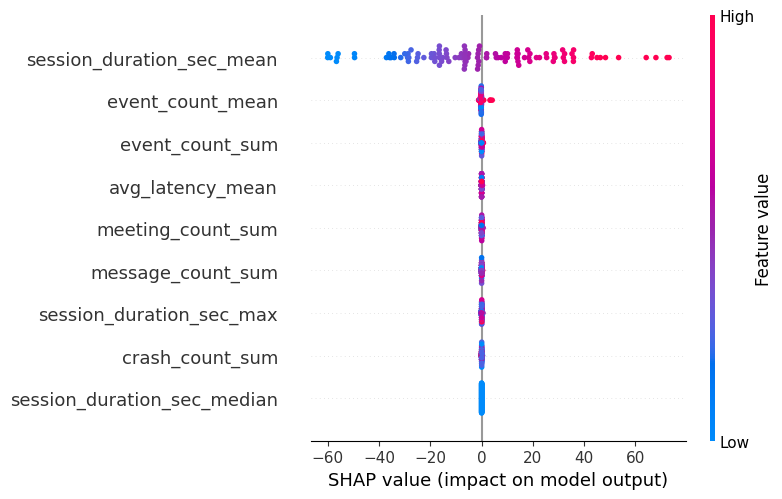

In [19]:
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, feature_names=feature_cols)


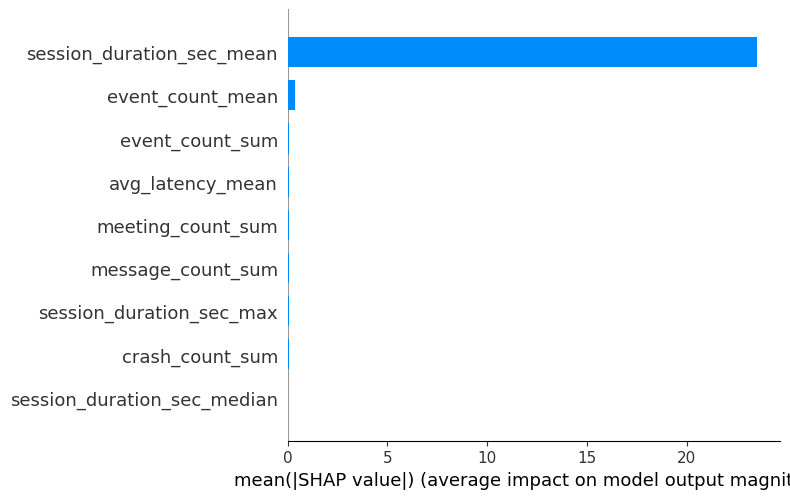

In [20]:
shap.summary_plot(shap_values, X_train, feature_names=feature_cols, plot_type="bar")


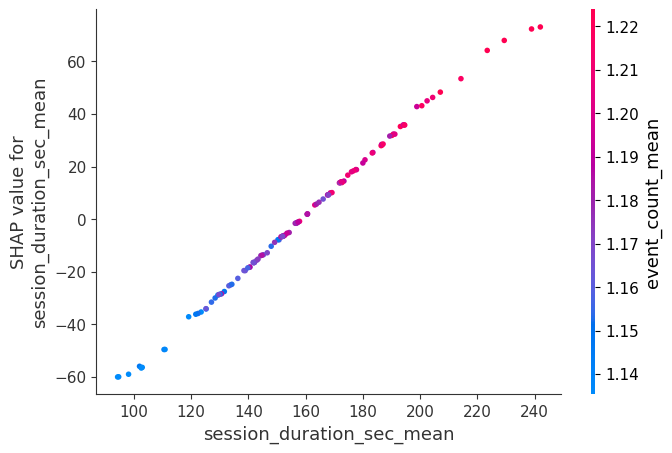

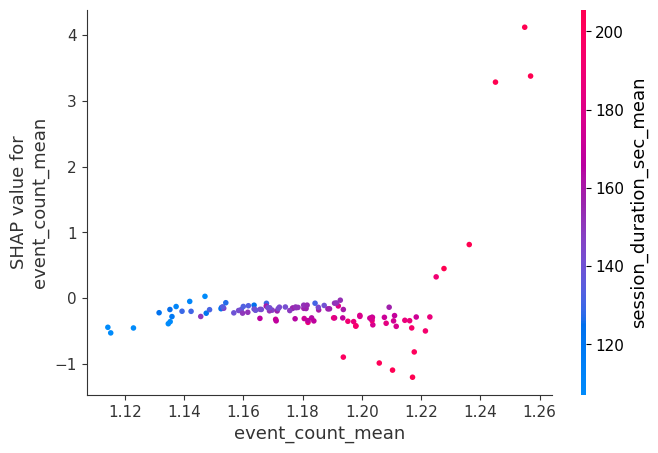

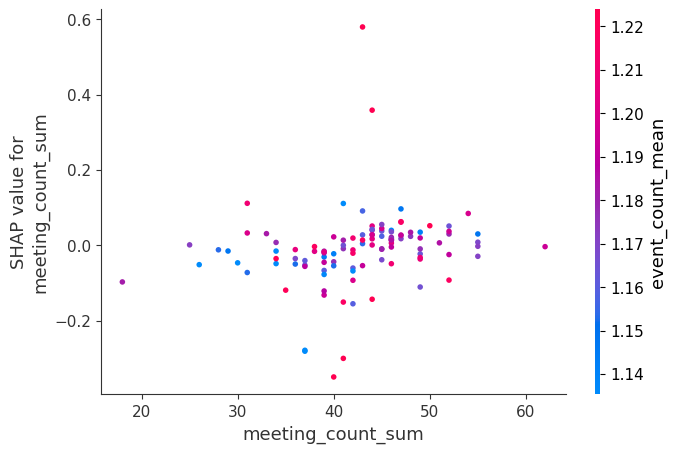

In [21]:
shap.dependence_plot("session_duration_sec_mean", shap_values, X_train, feature_names=feature_cols)
shap.dependence_plot("event_count_mean", shap_values, X_train, feature_names=feature_cols)
shap.dependence_plot("meeting_count_sum", shap_values, X_train, feature_names=feature_cols)


In [22]:
import numpy as np
import pandas as pd

mean_abs_shap = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame({
    "feature": feature_cols,
    "mean_abs_shap": mean_abs_shap
}).sort_values(by="mean_abs_shap", ascending=False)

importance_df


,feature,mean_abs_shap
0,session_duration_sec_mean,23.497449
3,event_count_mean,0.362162
4,event_count_sum,0.073586
8,avg_latency_mean,0.060274
5,meeting_count_sum,0.058417
6,message_count_sum,0.055792
2,session_duration_sec_max,0.050656
7,crash_count_sum,0.042158
1,session_duration_sec_median,0.000000


In [23]:
importance_df.style.bar(subset=["mean_abs_shap"], color="lightblue")


,feature,mean_abs_shap
0,session_duration_sec_mean,23.497449
3,event_count_mean,0.362162
4,event_count_sum,0.073586
8,avg_latency_mean,0.060274
5,meeting_count_sum,0.058417
6,message_count_sum,0.055792
2,session_duration_sec_max,0.050656
7,crash_count_sum,0.042158
1,session_duration_sec_median,0.000000


In [24]:
for i, row in importance_df.iterrows():
    print(f"{row['feature']}: {row['mean_abs_shap']:.4f}")


session_duration_sec_mean: 23.4974
event_count_mean: 0.3622
event_count_sum: 0.0736
avg_latency_mean: 0.0603
meeting_count_sum: 0.0584
message_count_sum: 0.0558
session_duration_sec_max: 0.0507
crash_count_sum: 0.0422
session_duration_sec_median: 0.0000


In [25]:
import joblib
import os

os.makedirs("../../models", exist_ok=True)

joblib.dump(rf_reg, "../../models/rf_reg.pkl")
joblib.dump(scaler, "../../models/scaler.pkl")

# Optional models if you want comparison
try:
    joblib.dump(dt_reg, "../../models/dt_reg.pkl")
    joblib.dump(svm_reg, "../../models/svm_reg.pkl")
    joblib.dump(nn_reg, "../../models/nn_reg.pkl")
    joblib.dump(lin_reg, "../../models/lin_reg.pkl")
except:
    pass

print("Models saved!")


Models saved!


In [26]:
import json
import pandas as pd

# load the newly saved features file
df = pd.read_csv(r"C:\Users\Diya\Downloads\teams-engagement-project\data\features.csv")

expected_features = [
    "session_duration_sec_mean",
    "session_duration_sec_median",
    "session_duration_sec_max",
    "event_count_mean",
    "event_count_sum",
    "meeting_count_sum",
    "message_count_sum",
    "crash_count_sum",
    "avg_latency_mean"
]

# calculate means
means = df[expected_features].mean()

# save the means.json in the models/ folder
with open(r"C:\Users\Diya\Downloads\teams-engagement-project\models\feature_means.json", "w") as f:
    json.dump(means.to_dict(), f)

means


session_duration_sec_mean       158.254784
session_duration_sec_median       0.000000
session_duration_sec_max       3035.771429
event_count_mean                  1.180767
event_count_sum                 357.142857
meeting_count_sum                42.614286
message_count_sum               177.528571
crash_count_sum                   1.300000
avg_latency_mean                120.246324
dtype: float64